## Problem Statement:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

## 1. Data Understanding and cleaning

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Load the data

In [2]:
# read the data set
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Understanding variable and sanity checks

In [3]:
#shape
df.shape

(167, 10)

In [4]:
# size
df.size

1670

In [5]:
# Checking the null values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Convert export, health income percentage into absolute value

In [8]:
df[df['country']== 'United States']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400


In [9]:
df[df['country']== 'Bhutan']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
18,Bhutan,42.7,42.5,5.2,70.7,6420,5.99,72.1,2.38,2180


In [10]:
df['exports'] =df['exports']*df['gdpp']/100
df['imports'] =df['imports']*df['gdpp']/100
df['health'] =df['health']*df['gdpp']/100

In [11]:
df[df['country']== 'United States']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,6001.6,8663.6,7647.2,49400,1.22,78.7,1.93,48400


In [12]:
df[df['country']== 'Bhutan']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
18,Bhutan,42.7,926.5,113.36,1541.26,6420,5.99,72.1,2.38,2180


## 2. Data Preparation

### Heatmaps

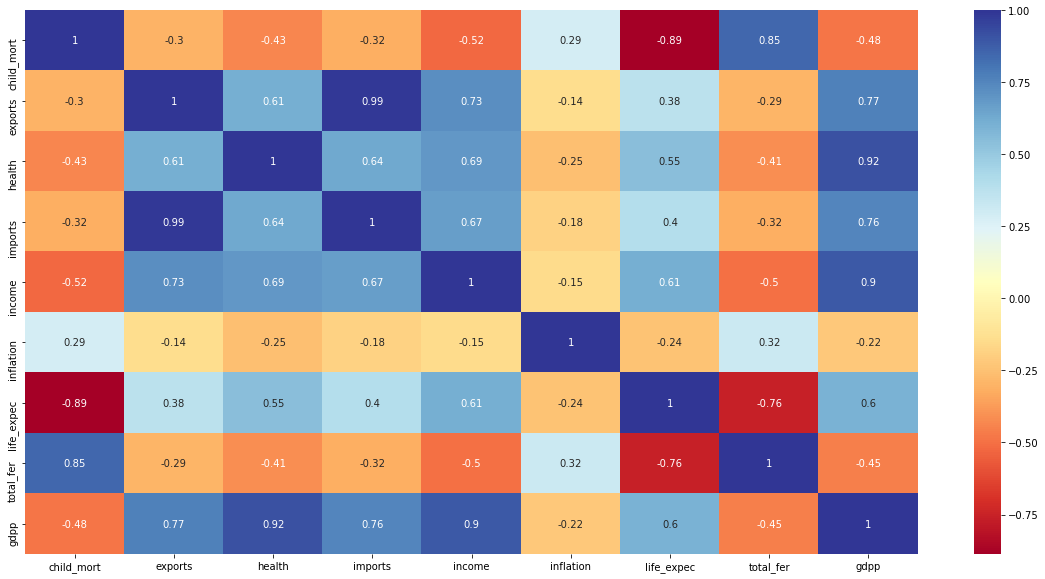

In [13]:
plt.figure(figsize = [20,10])
sns.heatmap(df.drop(['country'],axis =1).corr(),cmap ="RdYlBu",annot =True)
plt.show()

### Dropping country column


In [14]:
df1 = df.drop(['country'],axis =1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df1_scaled = sc.fit_transform(df1)


In [16]:
x = pd.DataFrame(df1_scaled)
x.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000295,0.003363,0.001661,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.006227,0.029486,0.013327,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.009315,0.020017,0.009388,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.011963,0.010148,0.010152,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.030204,0.083558,0.048190,0.148652,0.052213,0.881657,0.154574,0.114242


## 3. Model Building

### Hopkins statistic

In [17]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
hopkins(df1)

0.9809745769005106

#### Sice the value is >0.7 it is good for clustering

## Finding Optimal Value of clusters

### Sillhouette score

In [19]:
ss =[]
for k in range(2,10):
    kmeans = KMeans(n_clusters = k,random_state =100)
    kmeans.fit(df1_scaled)
    
    ss.append([k,silhouette_score(df1_scaled,kmeans.labels_)])

In [20]:
ss = pd.DataFrame(ss)

In [21]:
ss.columns = ['No. of clusters','Silhouette score']
ss

,No. of clusters,Silhouette score
0,2,0.404926
1,3,0.483951
2,4,0.340330
3,5,0.357157
4,6,0.361599
5,7,0.347025
6,8,0.366031
7,9,0.285589


Text(0, 0.5, 'Silhouette Score')

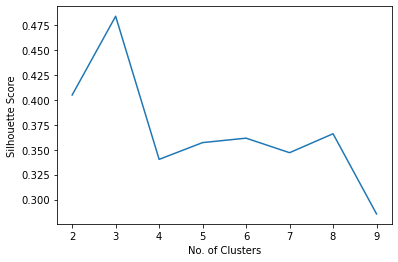

In [22]:
plt.plot(ss["No. of clusters"],ss["Silhouette score"])
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette Score")

#### Ideal no of clusters is 3

### Elbow Method

In [23]:
ssd=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state =100)
    kmeans.fit(df1_scaled)
    ssd.append([k,kmeans.inertia_])

In [24]:
ssd=pd.DataFrame(ssd)
ssd.columns=["Number of Clusters","SSD (Error)"]

In [25]:
ssd

,Number of Clusters,SSD (Error)
0,2,24.291593
1,3,13.728242
2,4,11.739840
3,5,9.757895
4,6,8.433613
5,7,7.461306
6,8,6.715433
7,9,6.027517


Text(0, 0.5, 'SSD (Error)')

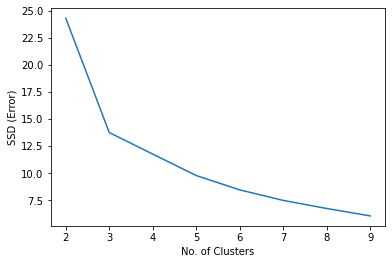

In [26]:
plt.plot(ssd["Number of Clusters"],ssd["SSD (Error)"])
plt.xlabel("No. of Clusters")
plt.ylabel("SSD (Error)")

#### Ideal value of cluster is 3

## Train the Final Model (Kmeans Clustering)

In [27]:
kmeans_final = KMeans(n_clusters =3,random_state =100)
kmeans_final.fit(df1_scaled)

KMeans(n_clusters=3, random_state=100)

In [28]:
out = kmeans_final.predict(df1_scaled)

In [29]:
out

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [30]:
df['Cluster_label'] =out
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


### Checking relation between cluster and input variables

In [31]:
# Relation between income and cluster
df.groupby(['Cluster_label'])['income'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developed Countries
#2 ---> Developing Countries

,Cluster_label,income
0,0,3516.804348
1,1,50192.857143
2,2,13935.376344


In [32]:
# Relation between income and health
df.groupby(['Cluster_label'])['health'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developed Countries
#2 ---> Developing Countries

,Cluster_label,health
0,0,94.207885
1,1,4360.932857
2,2,538.008198


In [33]:
# Relation between income and imports
df.groupby(['Cluster_label'])['imports'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developed Countries
#2 ---> Developing Countries

,Cluster_label,imports
0,0,748.806761
1,1,24952.539286
2,2,3947.726786


In [34]:
# Relation between income and exports
df.groupby(['Cluster_label'])['exports'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developed Countries
#2 ---> Developing Countries

,Cluster_label,exports
0,0,811.834109
1,1,30097.592857
2,2,3862.004070


In [35]:
# Relation between income and life_expec
df.groupby(['Cluster_label'])['life_expec'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developed Countries
#2 ---> Developing Countries

,Cluster_label,life_expec
0,0,59.393478
1,1,80.517857
2,2,73.077419


In [36]:
# Relation between income and child_mort
df.groupby(['Cluster_label'])['child_mort'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developed Countries
#2 ---> Developing Countries

,Cluster_label,child_mort
0,0,93.284783
1,1,4.942857
2,2,21.092473


In [37]:
# Relation between income and health
df.groupby(['Cluster_label'])['inflation'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developed Countries
#2 ---> Developing Countries

,Cluster_label,inflation
0,0,12.097065
1,1,2.901929
2,2,7.116634


### Labelling the Cluster_label
- 0 ---> Underdeveloped Countries
- 1----> Developed Countries
- 2 ---> Developing Countries

In [38]:
df['clusters']= df['Cluster_label'].map({0:'Underdeveloped',1:'Developed',2:'Developing'})
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_label,clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,Underdeveloped
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,Underdeveloped
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,Developing


### Plots between clusters and different data

<AxesSubplot:xlabel='clusters', ylabel='income'>

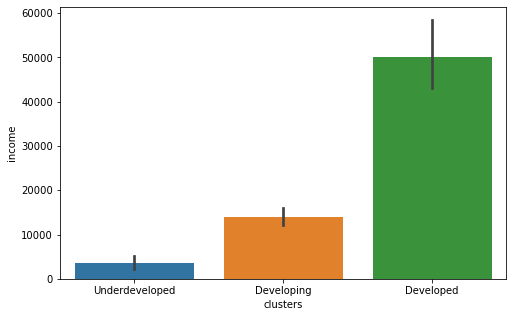

In [39]:
# barplot between clusters anf income
plt.figure(figsize=(8,5)) 
sns.barplot(x=df["clusters"],y=df["income"])

<AxesSubplot:xlabel='clusters', ylabel='income'>

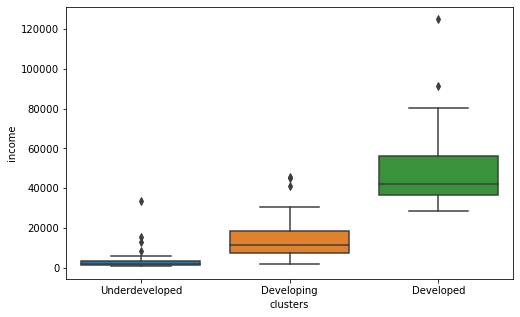

In [40]:
# boxplot between clusters anf income
plt.figure(figsize=(8,5)) 
sns.boxplot(x=df["clusters"],y=df["income"])

<AxesSubplot:xlabel='clusters', ylabel='gdpp'>

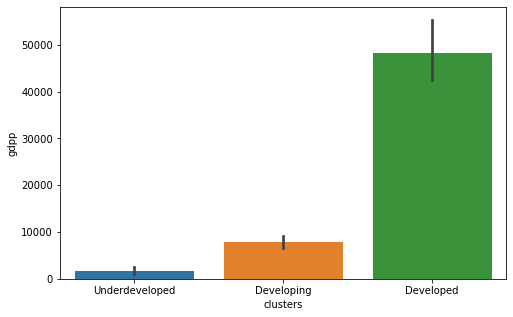

In [41]:
# barplot between clusters anf gdpp
plt.figure(figsize=(8,5)) 
sns.barplot(x=df["clusters"],y=df["gdpp"])

<AxesSubplot:xlabel='clusters', ylabel='gdpp'>

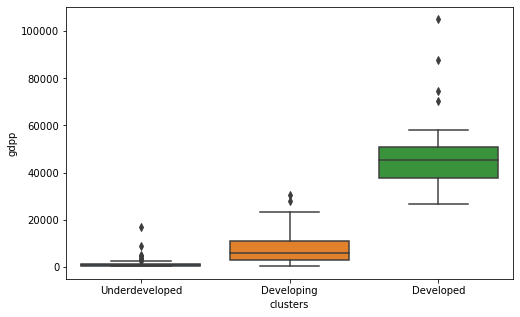

In [42]:
# box plot between clusters anf gdpp
plt.figure(figsize=(8,5)) 
sns.boxplot(x=df["clusters"],y=df["gdpp"])

<AxesSubplot:xlabel='clusters', ylabel='child_mort'>

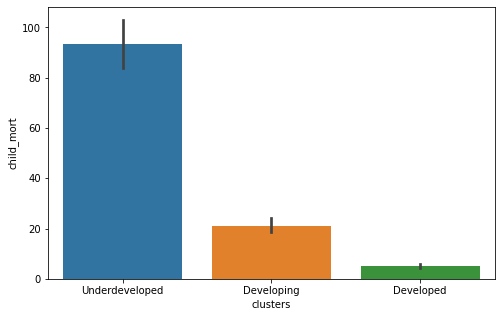

In [43]:
# barplot between clusters anf child_mort
plt.figure(figsize=(8,5)) 
sns.barplot(x=df["clusters"],y=df["child_mort"])

<AxesSubplot:xlabel='clusters', ylabel='child_mort'>

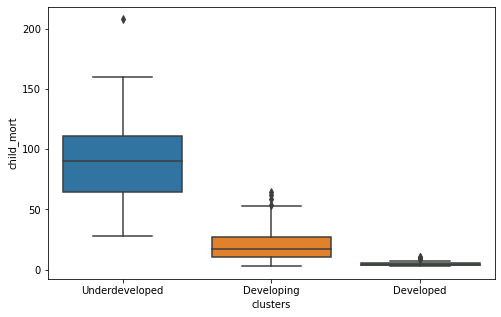

In [44]:
# boxplot between clusters anf child_mort
plt.figure(figsize=(8,5)) 
sns.boxplot(x=df["clusters"],y=df["child_mort"])

### List of developed , undeveloped and developing countries

In [45]:
# List of developed countries
df[df['clusters']=='Developed']['country']

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [46]:
# List of developing countries
df[df['clusters']=='Developing']['country']

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 93, dtype: object

In [47]:
# List of developed countries
df[df['clusters']=='Underdeveloped']['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     

## Hierarchical Clustering

In [48]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


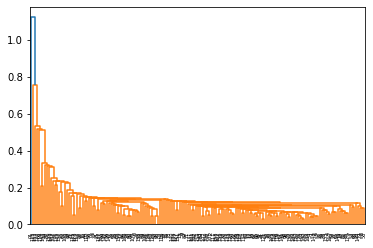

In [49]:
#single linkage
mergings = linkage(df1_scaled, method ='single',metric ='euclidean')
dendrogram(mergings)
plt.show()

#### In single linkage the dendrogram is not interpretable so we will go with complete linkage

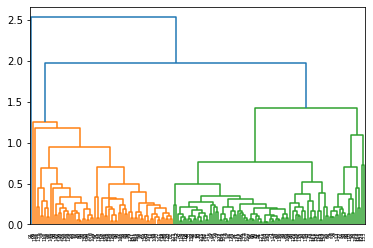

In [50]:
#complete linkage
mergings = linkage(df1_scaled, method ='complete',metric ='euclidean')
dendrogram(mergings)
plt.show()

In [51]:
# now designing the model with k =3
cluster_label = cut_tree(mergings,n_clusters =3).reshape(-1)
cluster_label

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [52]:
df['Cluster_label_h'] = cluster_label
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_label,clusters,Cluster_label_h
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,Underdeveloped,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,Developing,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,Developing,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,Underdeveloped,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,Developing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,2,Developing,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,2,Developing,1
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,2,Developing,1
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,0,Underdeveloped,0


### Checking relation between cluster and input variables

In [53]:
# Relation between income and cluster
df.groupby(['Cluster_label_h'])['income'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developing Countries
#2 ---> Developed Countries

,Cluster_label_h,income
0,0,4328.471429
1,1,25713.229167
2,2,91700.000000


In [54]:
# Relation between income and health
df.groupby(['Cluster_label_h'])['health'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developing Countries
#2 ---> Developed Countries

,Cluster_label_h,health
0,0,118.028773
1,1,1667.228448
2,2,8158.500000


In [55]:
# Relation between income and imports
df.groupby(['Cluster_label_h'])['imports'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developing Countries
#2 ---> Developed Countries

,Cluster_label_h,imports
0,0,928.270030
1,1,9230.998958
2,2,149100.000000


In [56]:
# Relation between income and imports
df.groupby(['Cluster_label_h'])['exports'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developing Countries
#2 ---> Developed Countries

,Cluster_label_h,exports
0,0,871.003679
1,1,10359.615521
2,2,183750.000000


In [57]:
# Relation between income and life_expec
df.groupby(['Cluster_label_h'])['life_expec'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developing Countries
#2 ---> Developed Countries

,Cluster_label_h,life_expec
0,0,62.241429
1,1,76.506250
2,2,81.300000


In [58]:
# Relation between income and child_mort
df.groupby(['Cluster_label_h'])['child_mort'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developing Countries
#2 ---> Developed Countries

,Cluster_label_h,child_mort
0,0,74.984286
1,1,11.868750
2,2,2.800000


In [59]:
# Relation between income and child_mort
df.groupby(['Cluster_label_h'])['inflation'].mean().reset_index()
#0 ---> Underdeveloped Countries
#1----> Developing Countries
#2 ---> Developed Countries

,Cluster_label_h,inflation
0,0,10.488071
1,1,5.851885
2,2,3.620000


### Labelling the Cluster_label
- 0 ---> Underdeveloped Countries
- 1----> Developing Countries
- 2 ---> Developed Countries

In [63]:
df['clusters_h']= df['Cluster_label_h'].map({0:'Underdeveloped',1:'Developing',2:'Developed'})
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_label,clusters,Cluster_label_h,clusters_h
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,Underdeveloped,0,Underdeveloped
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,Developing,1,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,Developing,1,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,Underdeveloped,0,Underdeveloped
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,Developing,1,Developing


### Plots between clusters and different data

<AxesSubplot:xlabel='clusters_h', ylabel='income'>

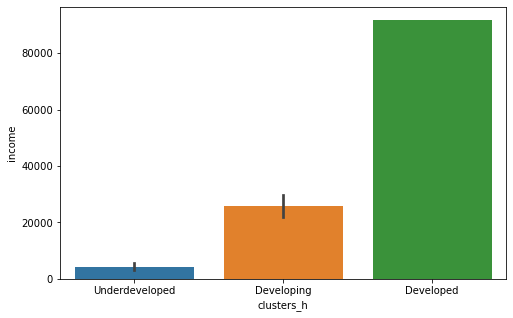

In [64]:
# barplot between clusters anf income
plt.figure(figsize=(8,5)) 
sns.barplot(x=df["clusters_h"],y=df["income"])

<AxesSubplot:xlabel='clusters_h', ylabel='income'>

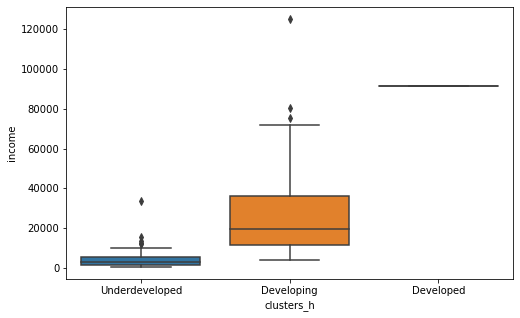

In [65]:
# boxplot between clusters anf income
plt.figure(figsize=(8,5)) 
sns.boxplot(x=df["clusters_h"],y=df["income"])

<AxesSubplot:xlabel='clusters_h', ylabel='gdpp'>

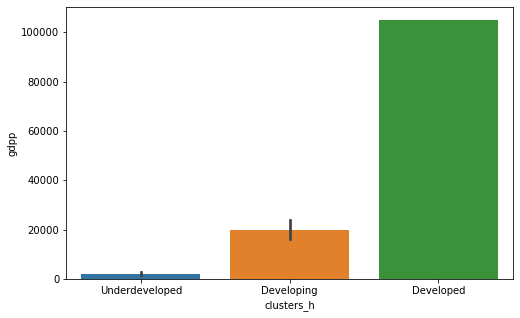

In [66]:
# barplot between clusters anf gdpp
plt.figure(figsize=(8,5)) 
sns.barplot(x=df["clusters_h"],y=df["gdpp"])

<AxesSubplot:xlabel='clusters_h', ylabel='gdpp'>

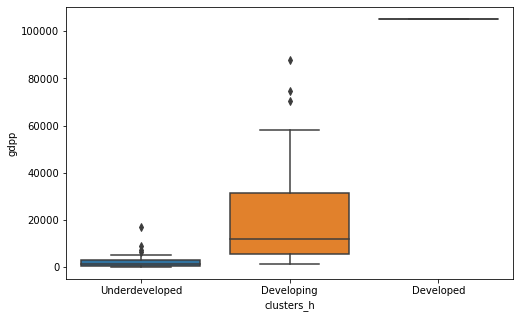

In [67]:
# boxplot between clusters anf gdpp
plt.figure(figsize=(8,5)) 
sns.boxplot(x=df["clusters_h"],y=df["gdpp"])

<AxesSubplot:xlabel='clusters_h', ylabel='child_mort'>

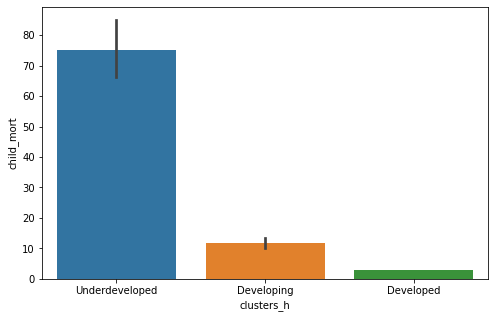

In [69]:
# barplot between clusters anf child_mort
plt.figure(figsize=(8,5)) 
sns.barplot(x=df["clusters_h"],y=df["child_mort"])

<AxesSubplot:xlabel='clusters_h', ylabel='child_mort'>

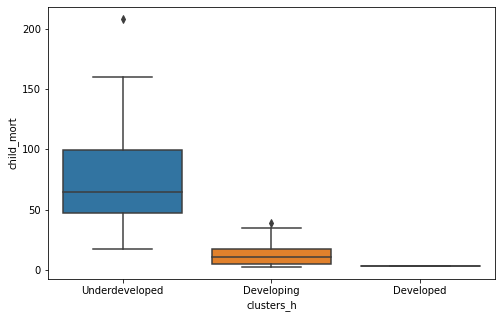

In [70]:
# boxplot between clusters anf child_mort
plt.figure(figsize=(8,5)) 
sns.boxplot(x=df["clusters_h"],y=df["child_mort"])

### List of developed , undeveloped and developing countries

In [72]:
# List of developed countries
df[df['clusters_h']=='Developed']['country']

91    Luxembourg
Name: country, dtype: object

In [73]:
# List of developing countries
df[df['clusters_h']=='Developing']['country']

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
158         United Kingdom
159          United States
160                Uruguay
163              Venezuela
164                Vietnam
Name: country, Length: 96, dtype: object

In [74]:
# List of underdeveloped countries
df[df['clusters_h']=='Underdeveloped']['country']

0      Afghanistan
3           Angola
12      Bangladesh
17           Benin
18          Bhutan
          ...     
155         Uganda
161     Uzbekistan
162        Vanuatu
165          Yemen
166         Zambia
Name: country, Length: 70, dtype: object